<a href="https://colab.research.google.com/github/saadrza/d_day_predict/blob/main/D_Day_Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# D-Day Weather Prediction

Data Analytics project

Authors: Saad Raza Hussain Shafi, Eva Trnovska

## Importing libraries

In [ ]:
!pip install contextily
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import geopandas
import contextily as ctx
import sklearn.cluster
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

Please upload the datasets or ensure that they are in the same folder

## Loading the datasets 'Summary of Weather' and 'Weather Station Locations'

In [ ]:
weather_summary = pd.read_csv('Summary of Weather.csv') #read csv
weather_summary

<ipython-input-22-94cfd246d11a>:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  weather_summary = pd.read_csv('Summary of Weather.csv') #read csv


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119036,82506,1945-12-28,9.906,NaN,29.444444,18.333333,23.888889,0.0,1.0,45,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
119037,82506,1945-12-29,0,NaN,28.333333,18.333333,23.333333,0.0,1.0,45,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
119038,82506,1945-12-30,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
weather_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

Several columns (FT, FB...) do not contain any values, thus there can be dropped.

In [ ]:
weather_summary.dropna(axis='columns', how='all', inplace=True)
weather_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 22 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

In [ ]:
dates = pd.to_datetime(weather_summary['Date'])
print(dates.min(), dates.max())
dates.sort_values().head(5)

1940-01-01 00:00:00 1945-12-31 00:00:00


54500   1940-01-01
57877   1940-01-01
6289    1940-01-01
57878   1940-01-02
6290    1940-01-02
Name: Date, dtype: datetime64[ns]

In [ ]:
loc=pd.read_csv('Weather Station Locations.csv') #read csv
loc

,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.650000
1,33031,LA SENIA,AL,3537N,00037E,88,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,3643N,00314E,23,36.716667,3.216667
3,33044,TELERGMA,AL,3607N,00621E,754,36.116667,6.416667
4,12001,TINDOUF,AL,2741N,00809W,443,27.683333,-8.083333
...,...,...,...,...,...,...,...,...
156,33109,EL AQUINA,TS,3651N,01015E,4,36.850000,10.016667
157,33121,EL DJEM,TS,3520N,01040E,9999,35.333333,10.066667
158,33003,SISI AHMED,TS,3712N,00950E,4,37.200000,9.083333
159,33307,ADANA,TU,3659N,03518E,20,36.983333,35.016667


In [ ]:
loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   WBAN              161 non-null    int64  
 1   NAME              161 non-null    object 
 2   STATE/COUNTRY ID  161 non-null    object 
 3   LAT               161 non-null    object 
 4   LON               161 non-null    object 
 5   ELEV              161 non-null    int64  
 6   Latitude          161 non-null    float64
 7   Longitude         161 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 10.2+ KB


Checking for the outliers in the Elevation data.

We have a few station with invalid data enteries.

## Visualisaing and clustering stations

In [ ]:
colors = ['#88CCEE', '#44AA99', '#117733', '#332288', '#EFCF3C', '#999933','#CC6677', '#882255', '#AA4499', '#828282']
gdf = geopandas.GeoDataFrame(loc, geometry=geopandas.points_from_xy(
    loc['Longitude'], loc['Latitude']), crs="EPSG:4326")
gdf = gdf.dropna(subset=['Longitude', 'Latitude'])
gdf = gdf.to_crs("EPSG:4087")
kmeans = sklearn.cluster.KMeans(n_clusters=len(colors), random_state=0, max_iter=50, n_init='auto').fit(gdf[['Longitude', 'Latitude']])
gdf['cluster'] = kmeans.labels_
gdf = gdf.to_crs("EPSG:3857")
polygons = gdf.dissolve(by='cluster')
loc = loc.merge(gdf[['WBAN','cluster']], on='WBAN')
loc

,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude,cluster
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.650000,0
1,33031,LA SENIA,AL,3537N,00037E,88,35.616667,0.583333,0
2,33023,MAISON BLANCHE,AL,3643N,00314E,23,36.716667,3.216667,0
3,33044,TELERGMA,AL,3607N,00621E,754,36.116667,6.416667,0
4,12001,TINDOUF,AL,2741N,00809W,443,27.683333,-8.083333,9
...,...,...,...,...,...,...,...,...,...
156,33109,EL AQUINA,TS,3651N,01015E,4,36.850000,10.016667,0
157,33121,EL DJEM,TS,3520N,01040E,9999,35.333333,10.066667,0
158,33003,SISI AHMED,TS,3712N,00950E,4,37.200000,9.083333,0
159,33307,ADANA,TU,3659N,03518E,20,36.983333,35.016667,7


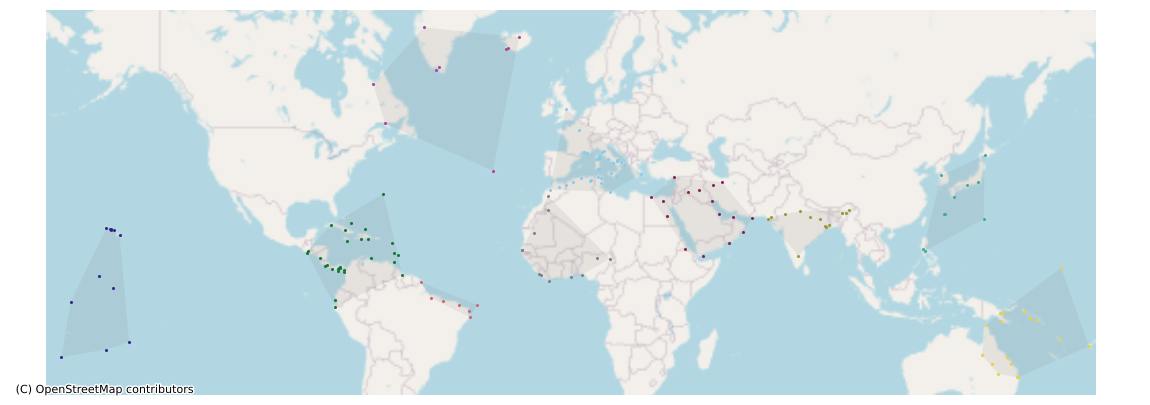

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
polygons.convex_hull.plot(ax=ax, alpha=0.12, facecolor='gray')
for i, c in enumerate(colors):
        gdf[gdf['cluster']==i].plot(ax=ax,  markersize=1.5, color=c, alpha=0.95)
ctx.add_basemap(ax, crs=gdf.crs.to_string(),
        source=ctx.providers.OpenStreetMap.Mapnik, alpha=0.9)
ax.axis('off')
plt.show()

## Merging Elevation from Weather Station Locations to Weather Summary.

In [ ]:
# Merge the DataFrames on the common column 'STA'
loc['State'] = loc['STATE/COUNTRY ID']
weather_summary = weather_summary.merge(loc[['WBAN','State', 'Longitude', 'Latitude', 'ELEV', 'cluster']], how='left', left_on='STA', right_on='WBAN')

# Drop the redundant 'WBAN' column
weather_summary.drop('WBAN', axis=1, inplace=True)


In [ ]:
weather_summary.head(5)

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,MEA,SNF,SND,PGT,TSHDSBRSGF,State,Longitude,Latitude,ELEV,cluster
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,75.0,0.0,NaN,NaN,NaN,GH,-0.3,5.6,62,9
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,78.0,0.0,NaN,NaN,NaN,GH,-0.3,5.6,62,9
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,76.0,0.0,NaN,NaN,NaN,GH,-0.3,5.6,62,9
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,76.0,0.0,NaN,NaN,NaN,GH,-0.3,5.6,62,9
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,76.0,0.0,NaN,NaN,NaN,GH,-0.3,5.6,62,9


# Data Cleaning and Visualisation

##Elevation

Checking for the outliers in the Elevation data and deleting those rows.

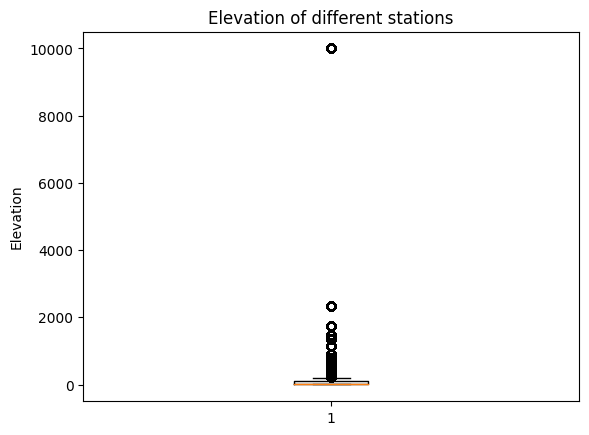

In [ ]:
plt.boxplot(weather_summary.ELEV)
plt.ylabel('Elevation')
plt.title('Elevation of different stations')
plt.show()

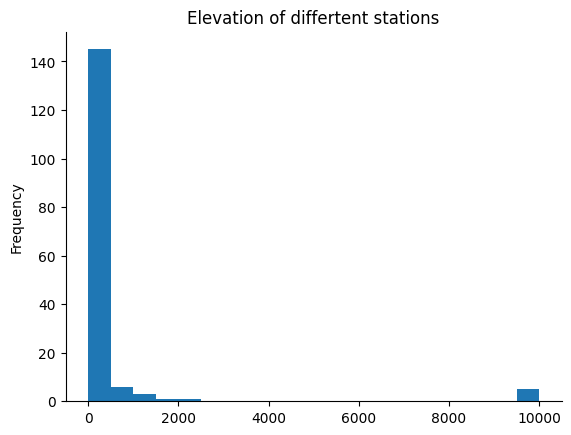

In [ ]:
loc['ELEV'].plot(kind='hist', bins=20, title='Elevation of differtent stations')
plt.gca().spines[['top', 'right',]].set_visible(False)

Deleting the rows with elevation of 9999 as they are outliers and can cause problems later on. We have confirmed from the website that this data is invalid. For example, for station El djem, the elevation is 9999 but in relaity it is [167m or 547 ft](https://en-gb.topographic-map.com/map-pjtgmt/El-Djem/?center=35.32179%2C10.68382).

In [ ]:
weather_summary.drop(weather_summary[weather_summary['ELEV'] == 9999].index, inplace=True)

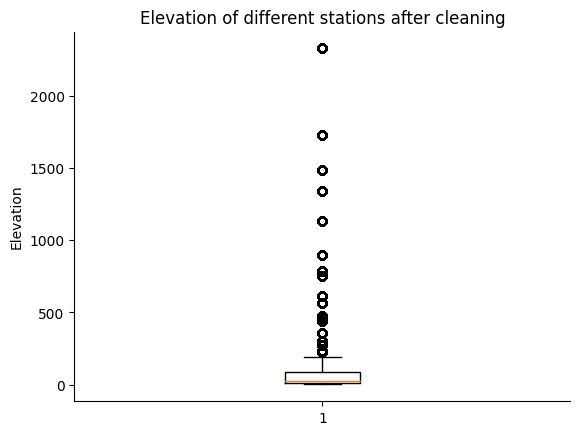

In [ ]:
plt.boxplot(weather_summary.ELEV)
plt.ylabel('Elevation')
plt.title('Elevation of different stations after cleaning')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

## Precipitation

In [ ]:
weather_summary.loc[weather_summary['Precip']=='T']

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,MEA,SNF,SND,PGT,TSHDSBRSGF,State,Longitude,Latitude,ELEV,cluster
6,10001,1942-7-7,T,NaN,28.333333,22.777778,25.555556,0.0,NaN,42,...,78.0,0.0,NaN,NaN,NaN,GH,-0.300000,5.600000,62,9
8,10001,1942-7-9,T,NaN,27.222222,22.777778,25.000000,0.0,NaN,42,...,77.0,0.0,NaN,NaN,NaN,GH,-0.300000,5.600000,62,9
15,10001,1942-7-16,T,NaN,26.111111,21.111111,23.333333,0.0,NaN,42,...,74.0,0.0,NaN,NaN,NaN,GH,-0.300000,5.600000,62,9
16,10001,1942-7-17,T,NaN,28.333333,22.222222,25.555556,0.0,NaN,42,...,78.0,0.0,NaN,NaN,NaN,GH,-0.300000,5.600000,62,9
17,10001,1942-7-18,T,NaN,26.666667,21.111111,23.888889,0.0,NaN,42,...,75.0,0.0,NaN,NaN,NaN,GH,-0.300000,5.600000,62,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119001,82506,1945-11-23,T,NaN,26.666667,18.333333,22.222222,0.0,1.0,45,...,72.0,0.0,NaN,NaN,1.0,AU,153.133333,-27.433333,2,4
119006,82506,1945-11-28,T,NaN,28.333333,21.111111,24.444444,0.0,1.0,45,...,76.0,0.0,NaN,NaN,1.0,AU,153.133333,-27.433333,2,4
119014,82506,1945-12-6,T,NaN,27.222222,17.777778,22.222222,0.0,1.0,45,...,72.0,0.0,NaN,NaN,1.0,AU,153.133333,-27.433333,2,4
119018,82506,1945-12-10,T,NaN,30.000000,19.444444,24.444444,0.0,NaN,45,...,76.0,0.0,NaN,NaN,NaN,AU,153.133333,-27.433333,2,4


In [ ]:
# Delete rows with invalid precipitation column
weather_summary.drop(weather_summary[weather_summary['Precip']=='T'].index, inplace=True)
weather_summary.loc[weather_summary['Precip']=='T']

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,MEA,SNF,SND,PGT,TSHDSBRSGF,State,Longitude,Latitude,ELEV,cluster


In [ ]:
weather_summary.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,MEA,SNF,SND,PGT,TSHDSBRSGF,State,Longitude,Latitude,ELEV,cluster
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,75.0,0.0,NaN,NaN,NaN,GH,-0.3,5.6,62,9
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,78.0,0.0,NaN,NaN,NaN,GH,-0.3,5.6,62,9
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,76.0,0.0,NaN,NaN,NaN,GH,-0.3,5.6,62,9
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,76.0,0.0,NaN,NaN,NaN,GH,-0.3,5.6,62,9
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,76.0,0.0,NaN,NaN,NaN,GH,-0.3,5.6,62,9


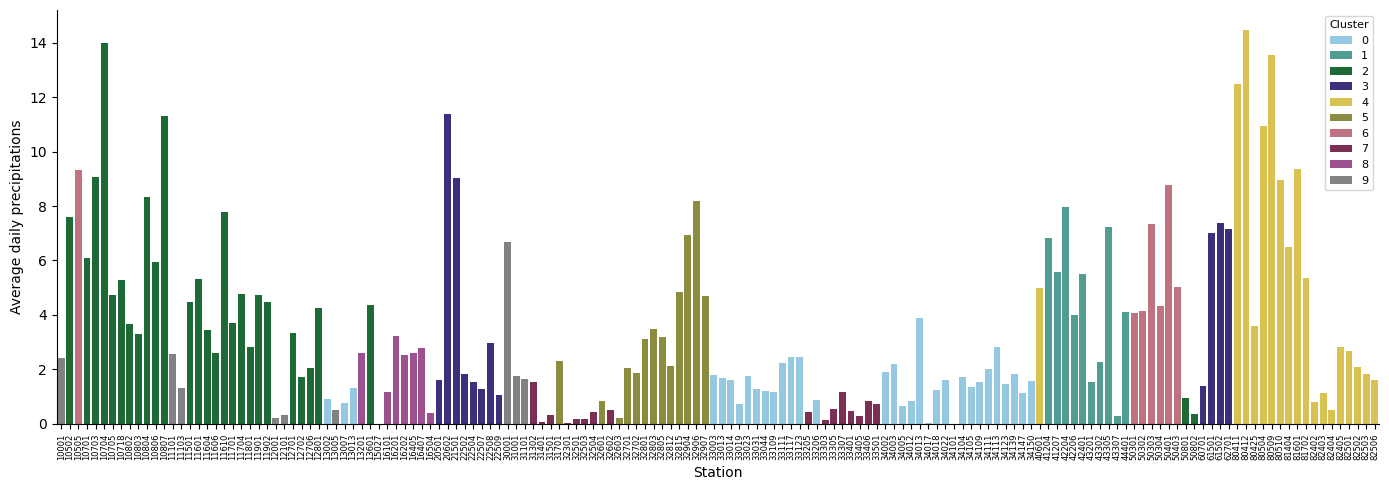

In [ ]:
plt.subplots(figsize=(14,5))
weather_summary['Precip'] = pd.to_numeric(weather_summary['Precip'])
precp = weather_summary[['STA', 'Precip', 'cluster']].groupby(by='STA').mean('Precip').astype({'cluster':int})
g = sns.barplot(data=precp, x='STA', y='Precip', hue='cluster', palette=colors)
g.set_ylabel("Average daily precipitations",fontsize=10)
g.set_xlabel("Station",fontsize=10)
plt.legend(fontsize=8, title_fontsize=8, title='Cluster')
plt.gca().spines[['top', 'right',]].set_visible(False)
for item in g.get_xticklabels():
    item.set_rotation(90)
    item.set_fontsize(6)
plt.tight_layout()

## Wind Speed

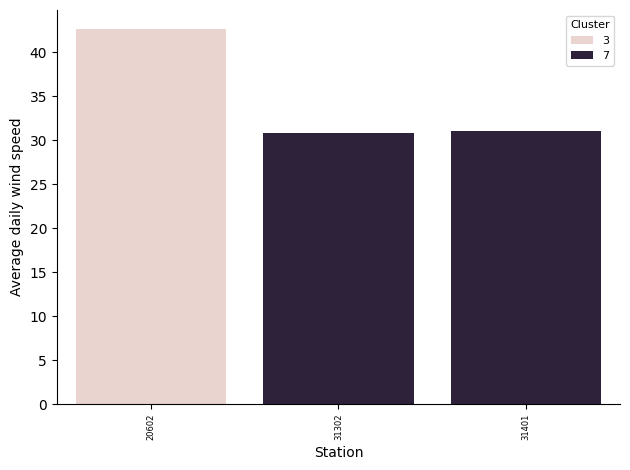

In [ ]:
weather_summary['WindGustSpd'] = pd.to_numeric(weather_summary['WindGustSpd'])
wind = weather_summary[['STA', 'WindGustSpd', 'cluster']].groupby(by='STA').mean('WindGustSpd').astype({'cluster':int})
wind = wind[wind['WindGustSpd'] > 0]
g = sns.barplot(data=wind, x='STA', y='WindGustSpd', hue='cluster')
g.set_ylabel("Average daily wind speed",fontsize=10)
g.set_xlabel("Station",fontsize=10)
plt.legend(fontsize=8, title_fontsize=8, title='Cluster')
plt.gca().spines[['top', 'right',]].set_visible(False)
for item in g.get_xticklabels():
    item.set_rotation(90)
    item.set_fontsize(6)
plt.tight_layout()

## Temperatures

Visualising temerature columns in realtionship to stations.

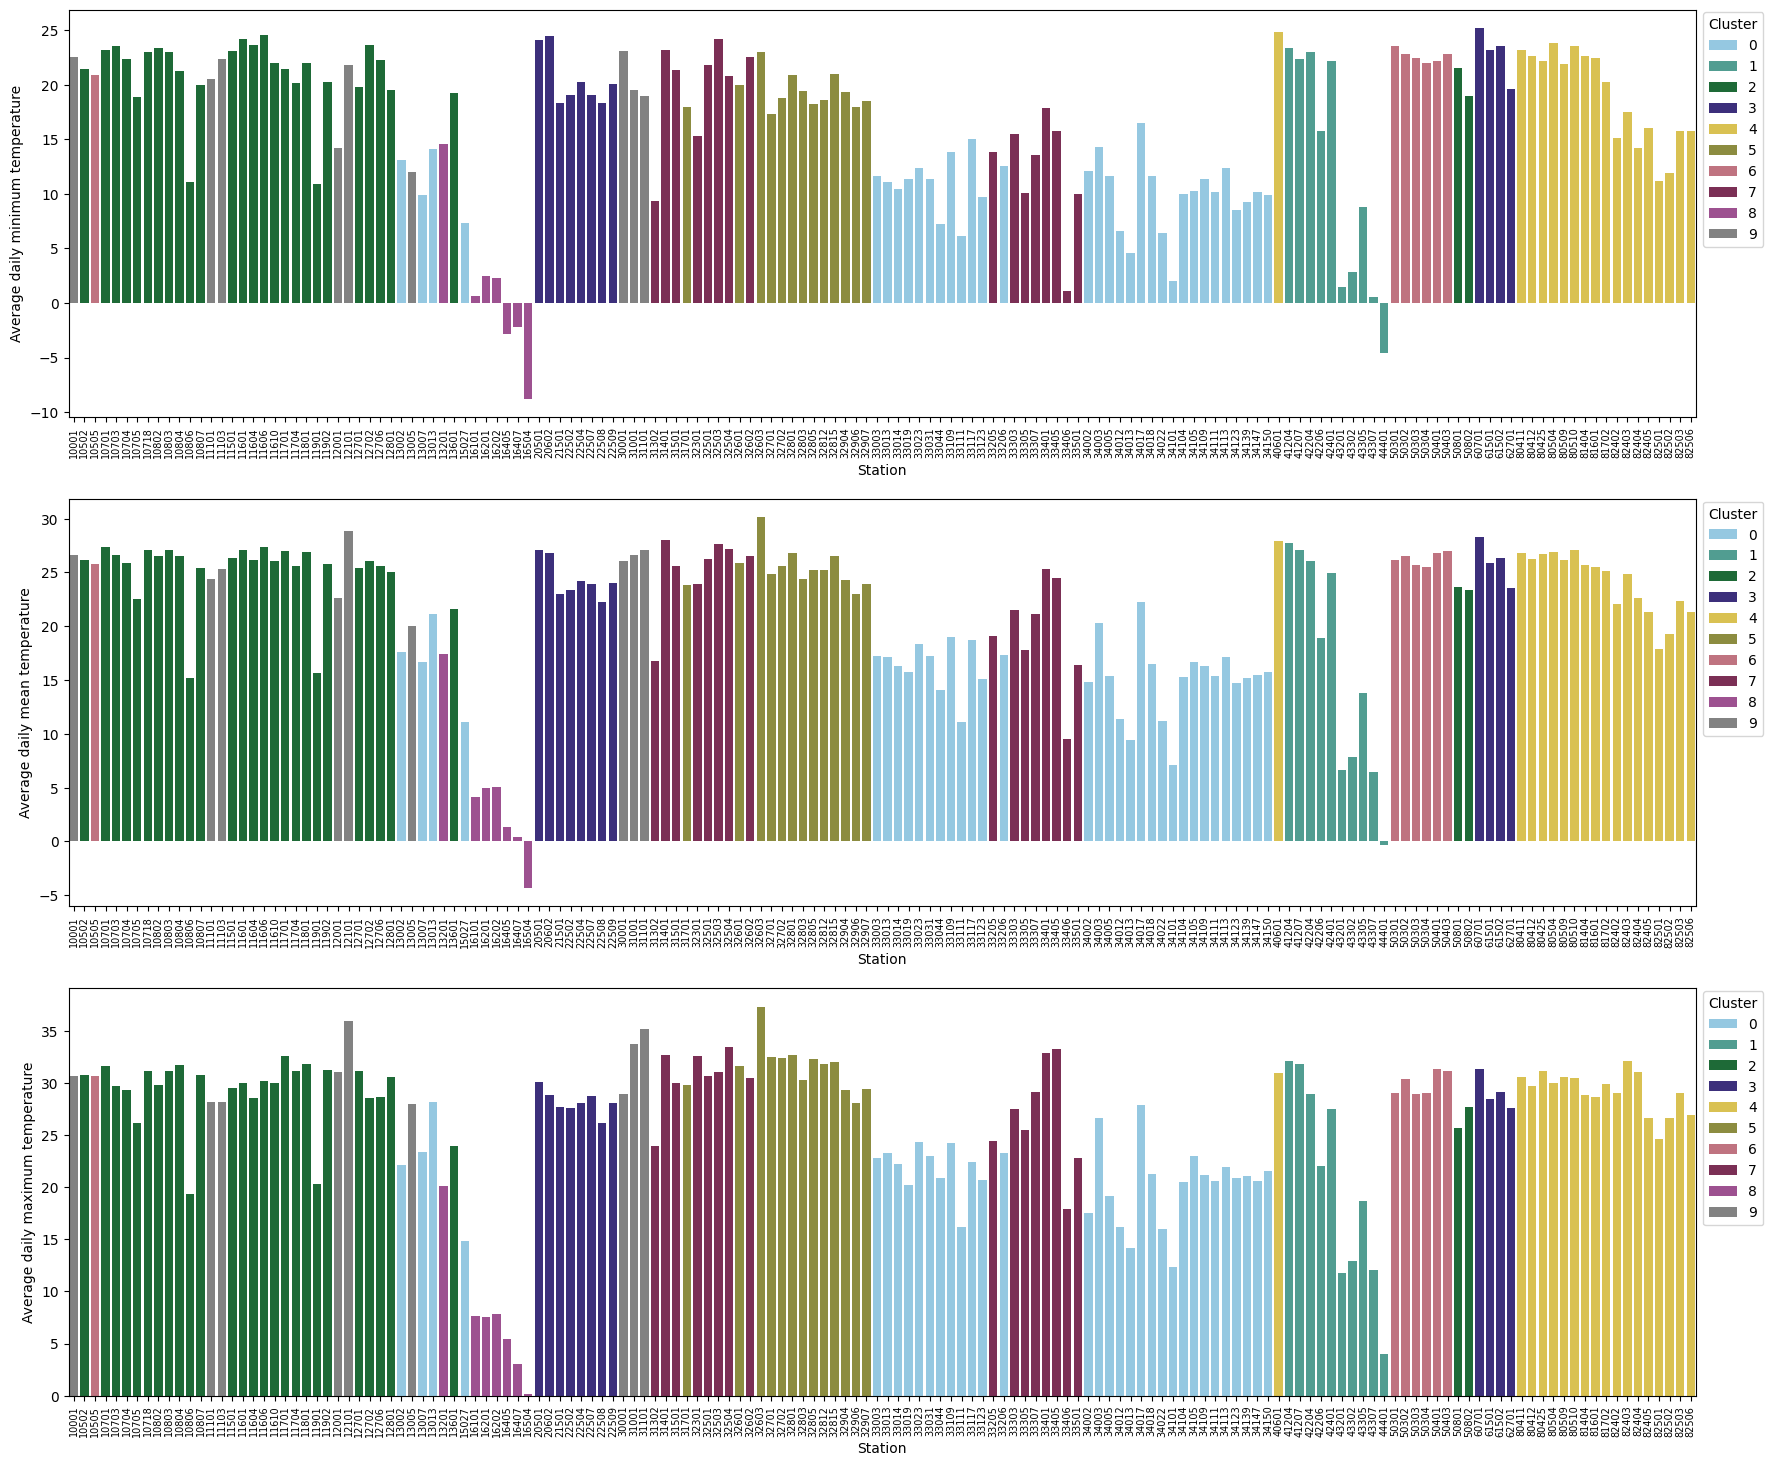

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(21, 18))
strs = ['minimum', 'mean', 'maximum']
for i, temp in enumerate(['MinTemp','MeanTemp', 'MaxTemp']):
  tmp = weather_summary.groupby(['STA', 'cluster'])[temp].mean().reset_index()
  sns.barplot(tmp, x='STA', y=tmp[temp], hue='cluster', palette=colors, ax=axs[i])
  axs[i].legend(bbox_to_anchor=(1,1.01), title='Cluster')
  axs[i].tick_params(axis='x', labelrotation=90, labelsize=7)
  axs[i].set_ylabel(f"Average daily {strs[i]} temperature", fontsize=10)
  axs[i].set_xlabel("Station",fontsize=10)

## Snowfall


Checking if Snowfall has any non-zero value. If yes, we will keep it or else discard the column.

In [ ]:
weather_summary.loc[weather_summary['Snowfall']!= 0]

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,MEA,SNF,SND,PGT,TSHDSBRSGF,State,Longitude,Latitude,ELEV,cluster
13529,10803,1940-12-26,0.000,NaN,30.555556,22.777778,26.666667,NaN,NaN,40,...,80.0,NaN,NaN,NaN,NaN,PM,-80.000000,8.366667,22,2
17907,10807,1945-11-19,108.204,NaN,30.555556,18.888889,24.444444,NaN,NaN,45,...,76.0,NaN,NaN,NaN,NaN,CS,-84.450000,9.516667,6,2
32768,11902,1945-10-18,0.000,NaN,29.444444,21.666667,25.555556,0,NaN,45,...,78.0,0,NaN,NaN,NaN,GU,-90.833333,13.916667,5,2
32769,11902,1945-10-19,0.000,NaN,30.000000,20.555556,25.555556,0,NaN,45,...,78.0,0,NaN,NaN,NaN,GU,-90.833333,13.916667,5,2
32770,11902,1945-10-20,16.256,NaN,31.111111,20.555556,25.555556,0,1,45,...,78.0,0,NaN,NaN,1,GU,-90.833333,13.916667,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97434,44401,1945-11-28,0.254,NaN,0.555556,-6.666667,-3.333333,7.62,1,45,...,26.0,0.3,NaN,NaN,1,JP,141.550000,42.800000,27,1
97525,50301,1943-10-31,0.000,NaN,29.444444,23.333333,26.666667,NaN,NaN,43,...,80.0,NaN,NaN,NaN,NaN,BZ,-32.483333,-3.833333,38,6
97590,50301,1944-1-4,0.000,NaN,30.000000,23.888889,26.666667,NaN,NaN,44,...,80.0,NaN,NaN,NaN,NaN,BZ,-32.483333,-3.833333,38,6
115327,82403,1944-7-16,0.000,NaN,22.777778,8.888889,15.555556,2.54,NaN,44,...,60.0,0.1,NaN,NaN,NaN,AU,140.583333,-20.683333,188,4


In [ ]:
# Get distinct values in the 'Snowfall' column
distinct_snowfall_values = weather_summary['Snowfall'].unique()
distinct_snowfall_values

array([0.0, nan, '0', '22.86', '30.48', '2.54', '5.08', '10.16', '7.62',
       '20.32', '15.24', '17.78', '12.7', '25.4', '27.94', '33.02',
       '43.18', '38.1', '45.72', '53.34', '58.42', '66.04', '76.2',
       '81.28', '73.66', '63.5', '50.8', '48.26', '60.96', '55.88',
       '35.56', '78.74', '40.64', '86.36', '83.82', '68.58', '#VALUE!',
       10.16, 7.62, 15.24, 2.54, 5.08, 12.7], dtype=object)

In [ ]:
# Records including snowfall (different from 0)
weather_summary['Snowfall'] = pd.to_numeric(weather_summary['Snowfall'], errors='coerce')
weather_summary.loc[weather_summary['Snowfall']!=0]

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,MEA,SNF,SND,PGT,TSHDSBRSGF,State,Longitude,Latitude,ELEV,cluster
13529,10803,1940-12-26,0.000,NaN,30.555556,22.777778,26.666667,NaN,NaN,40,...,80.0,NaN,NaN,NaN,NaN,PM,-80.000000,8.366667,22,2
17907,10807,1945-11-19,108.204,NaN,30.555556,18.888889,24.444444,NaN,NaN,45,...,76.0,NaN,NaN,NaN,NaN,CS,-84.450000,9.516667,6,2
35646,12702,1944-3-13,0.000,NaN,-17.777778,-17.777778,-17.777778,NaN,NaN,44,...,NaN,NaN,NaN,NaN,NaN,TI,-71.050000,21.483333,4,2
36078,12702,1945-5-19,0.000,NaN,-17.777778,-17.777778,-17.777778,NaN,NaN,45,...,NaN,NaN,NaN,NaN,NaN,TI,-71.050000,21.483333,4,2
36196,12706,1945-4-1,0.000,NaN,26.666667,23.333333,25.000000,NaN,0,45,...,77.0,NaN,0.0,NaN,0,BA,-75.733333,23.516667,19,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97434,44401,1945-11-28,0.254,NaN,0.555556,-6.666667,-3.333333,7.62,1,45,...,26.0,0.3,NaN,NaN,1,JP,141.550000,42.800000,27,1
97525,50301,1943-10-31,0.000,NaN,29.444444,23.333333,26.666667,NaN,NaN,43,...,80.0,NaN,NaN,NaN,NaN,BZ,-32.483333,-3.833333,38,6
97590,50301,1944-1-4,0.000,NaN,30.000000,23.888889,26.666667,NaN,NaN,44,...,80.0,NaN,NaN,NaN,NaN,BZ,-32.483333,-3.833333,38,6
115327,82403,1944-7-16,0.000,NaN,22.777778,8.888889,15.555556,2.54,NaN,44,...,60.0,0.1,NaN,NaN,NaN,AU,140.583333,-20.683333,188,4


<ipython-input-45-90cea60b0fca>:3: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  ax = sns.barplot(data=snow, x='STA', y='Snowfall', hue='cluster', palette=colors)


Text(0.5, 0, 'Station')

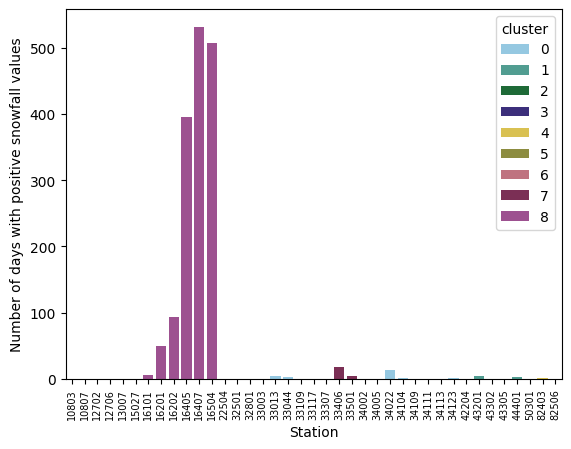

In [ ]:
# Stations where snowfall occured
snow = weather_summary[weather_summary['Snowfall']!=0][['STA', 'cluster', 'Snowfall']].groupby(['STA', 'cluster']).count().reset_index()
ax = sns.barplot(data=snow, x='STA', y='Snowfall', hue='cluster', palette=colors)
ax.tick_params(axis='x', labelrotation=90, labelsize=7)
ax.set_ylabel('Number of days with positive snowfall values')
ax.set_xlabel('Station')

## Poor Weather

In [ ]:
weather_summary['PoorWeather'].unique()

array([nan, '1', '1     1', '1 1', '1     1  1', '1  1', '0', '1   1 1',
       '1    1', '1     0', '1000', '1001', '100000', '1000001000',
       '101000', '1000001001', '1000101001', '100001', '1000000000',
       '1010001000', '1000100000', '1000101000', '1000100001', '101001',
       '1010001001', '10001001', '11', '11    1', '1100000', '1 1  1',
       '1 0  1', '1 0', '1000000', '1101000', '1101001', '1   1 1  1',
       '1   1', '11 1', 1.0], dtype=object)

In [ ]:
# Supposing that values other than '0' or NaN signify poor weather in some aspect
weather_summary['PoorWeather'] = ~weather_summary['PoorWeather'].isin(['0',np.nan])
weather_summary[weather_summary['PoorWeather']]

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,MEA,SNF,SND,PGT,TSHDSBRSGF,State,Longitude,Latitude,ELEV,cluster
403,10001,1943-8-8,0.254,NaN,24.444444,21.111111,22.777778,0.0,True,43,...,73.0,0.0,NaN,NaN,1,GH,-0.300000,5.600000,62,9
420,10001,1943-8-25,1.778,NaN,24.444444,21.111111,22.777778,0.0,True,43,...,73.0,0.0,NaN,NaN,1,GH,-0.300000,5.600000,62,9
421,10001,1943-8-26,2.540,NaN,25.000000,21.666667,23.333333,0.0,True,43,...,74.0,0.0,NaN,NaN,1,GH,-0.300000,5.600000,62,9
422,10001,1943-8-27,0.508,NaN,25.555556,20.000000,22.777778,0.0,True,43,...,73.0,0.0,NaN,NaN,1,GH,-0.300000,5.600000,62,9
426,10001,1943-8-31,1.016,NaN,26.666667,20.555556,23.888889,0.0,True,43,...,75.0,0.0,NaN,NaN,1,GH,-0.300000,5.600000,62,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119026,82506,1945-12-18,19.812,NaN,30.555556,19.444444,25.000000,0.0,True,45,...,77.0,0.0,NaN,NaN,1.0,AU,153.133333,-27.433333,2,4
119027,82506,1945-12-19,10.160,NaN,25.555556,18.888889,22.222222,0.0,True,45,...,72.0,0.0,NaN,NaN,1.0,AU,153.133333,-27.433333,2,4
119033,82506,1945-12-25,0.508,NaN,28.888889,18.888889,23.888889,0.0,True,45,...,75.0,0.0,NaN,NaN,1.0,AU,153.133333,-27.433333,2,4
119036,82506,1945-12-28,9.906,NaN,29.444444,18.333333,23.888889,0.0,True,45,...,75.0,0.0,NaN,NaN,1.0,AU,153.133333,-27.433333,2,4


## Other columns

In [ ]:
weather_summary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99144 entries, 0 to 119039
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   STA          99144 non-null  int64  
 1   Date         99144 non-null  object 
 2   Precip       99144 non-null  float64
 3   WindGustSpd  468 non-null    float64
 4   MaxTemp      99144 non-null  float64
 5   MinTemp      99144 non-null  float64
 6   MeanTemp     99144 non-null  float64
 7   Snowfall     98218 non-null  float64
 8   PoorWeather  99144 non-null  bool   
 9   YR           99144 non-null  int64  
 10  MO           99144 non-null  int64  
 11  DA           99144 non-null  int64  
 12  PRCP         97216 non-null  object 
 13  DR           469 non-null    float64
 14  SPD          468 non-null    float64
 15  MAX          98717 non-null  float64
 16  MIN          98722 non-null  float64
 17  MEA          98693 non-null  float64
 18  SNF          98241 non-null  object 
 19  SND     

PRCP is preciptation in inches. SPD is speed in knots from km/h as in WindGusSpd. Max, Min, MEA is again in temperatures in farhenheit.

In [ ]:
weather_summary=weather_summary.drop(columns=['YR', 'MO', 'DR', 'DA','PRCP', 'SPD', 'SNF', 'SND', 'MAX', 'MEA', 'MIN', 'PGT', 'TSHDSBRSGF'])
weather_summary

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,State,Longitude,Latitude,ELEV,cluster
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,False,GH,-0.300000,5.600000,62,9
1,10001,1942-7-2,0.000,NaN,28.888889,21.666667,25.555556,0.0,False,GH,-0.300000,5.600000,62,9
2,10001,1942-7-3,2.540,NaN,26.111111,22.222222,24.444444,0.0,False,GH,-0.300000,5.600000,62,9
3,10001,1942-7-4,2.540,NaN,26.666667,22.222222,24.444444,0.0,False,GH,-0.300000,5.600000,62,9
4,10001,1942-7-5,0.000,NaN,26.666667,21.666667,24.444444,0.0,False,GH,-0.300000,5.600000,62,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0.000,NaN,28.333333,18.333333,23.333333,0.0,False,AU,153.133333,-27.433333,2,4
119036,82506,1945-12-28,9.906,NaN,29.444444,18.333333,23.888889,0.0,True,AU,153.133333,-27.433333,2,4
119037,82506,1945-12-29,0.000,NaN,28.333333,18.333333,23.333333,0.0,True,AU,153.133333,-27.433333,2,4
119038,82506,1945-12-30,0.000,NaN,28.333333,18.333333,23.333333,0.0,False,AU,153.133333,-27.433333,2,4


In [ ]:
weather_summary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99144 entries, 0 to 119039
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   STA          99144 non-null  int64  
 1   Date         99144 non-null  object 
 2   Precip       99144 non-null  float64
 3   WindGustSpd  468 non-null    float64
 4   MaxTemp      99144 non-null  float64
 5   MinTemp      99144 non-null  float64
 6   MeanTemp     99144 non-null  float64
 7   Snowfall     98218 non-null  float64
 8   PoorWeather  99144 non-null  bool   
 9   State        99144 non-null  object 
 10  Longitude    99144 non-null  float64
 11  Latitude     99144 non-null  float64
 12  ELEV         99144 non-null  int64  
 13  cluster      99144 non-null  int32  
dtypes: bool(1), float64(8), int32(1), int64(2), object(2)
memory usage: 12.3+ MB


Descriptive statistics after cleaning

In [ ]:
weather_summary.describe()

,STA,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,Longitude,Latitude,ELEV,cluster
count,99144.000000,99144.000000,468.000000,99144.000000,99144.000000,99144.000000,98218.000000,99144.000000,99144.000000,99144.000000,99144.000000
mean,30355.872862,3.565666,37.764179,27.178134,17.633689,22.398817,0.239058,-13.126818,17.777016,127.644608,3.796901
std,20996.804533,11.046887,10.513389,8.667278,8.251786,8.219649,2.659869,89.685078,19.705468,303.404221,2.641882
min,10001.000000,0.000000,18.520000,-33.333333,-38.333333,-35.555556,0.000000,-175.000000,-27.600000,1.000000,0.000000
25%,11902.000000,0.000000,29.632000,25.555556,14.444444,20.000000,0.000000,-79.500000,8.233333,9.000000,2.000000
50%,31101.000000,0.000000,37.040000,29.444444,20.555556,25.555556,0.000000,-21.916667,18.550000,24.000000,3.000000
75%,34002.000000,1.524000,42.596000,31.666667,23.333333,27.222222,0.000000,50.566667,30.133333,88.000000,6.000000
max,82506.000000,307.340000,75.932000,50.000000,34.444444,40.000000,86.360000,177.366667,67.016667,2326.000000,9.000000


# Correlation Matrix

We analyze the correlation among the following groups of variables:

a) Precipitation and snowfall (faetures to predict)

b) Temperatures, wind speed, poor weather, geographic information

In [ ]:
weather_summary.columns

Index(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
       'MeanTemp', 'Snowfall', 'PoorWeather', 'State', 'Longitude', 'Latitude',
       'ELEV', 'cluster'],
      dtype='object')

In [ ]:
df_corr = weather_summary[[ 'Precip',   'MinTemp', 'MeanTemp' , 'MaxTemp', 'Snowfall','WindGustSpd', 'ELEV', 'PoorWeather']]#, 'DA', 'MO']]

In [ ]:
data=df_corr.corr()

<Axes: >

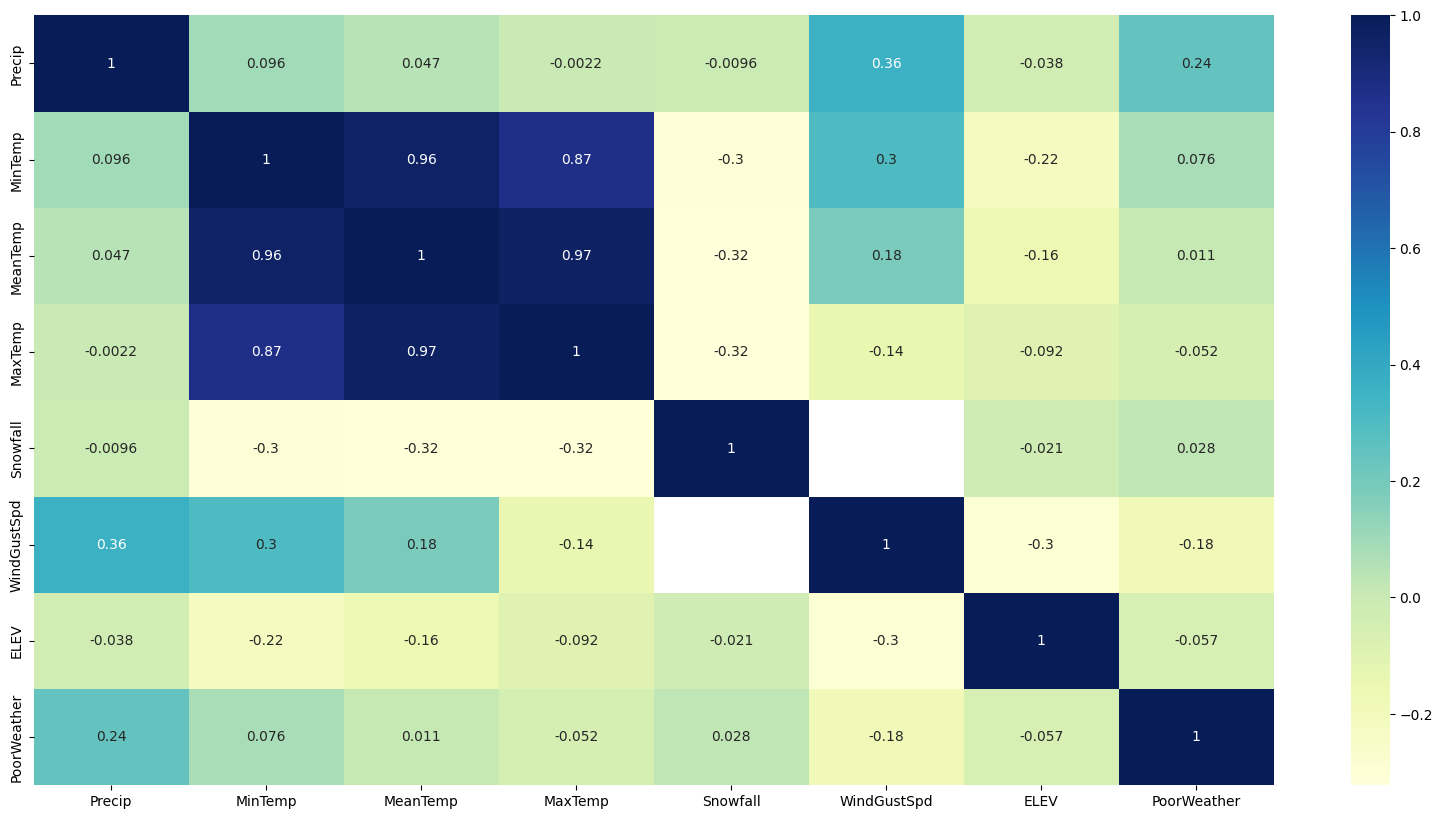

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(data=df_corr.corr(), cmap="YlGnBu", annot=True)

After adding previous days:

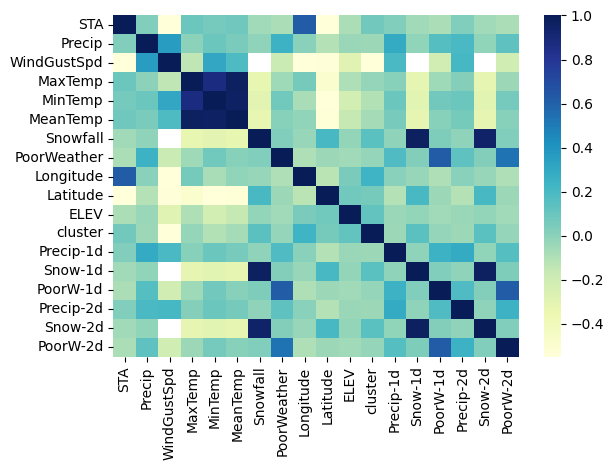

In [ ]:
df_c = weather_summary.copy()
df_c['Date'] = pd.to_datetime(df_c['Date'], errors='coerce')
df_c2 = df_c[['Precip', 'Snowfall', 'cluster']].copy()
for day in range(1,3):
    df_c[f'Precip-{day}d'] = df_c.shift(day)['Precip']
    df_c[f'Snow-{day}d'] = df_c.shift(day)['Snowfall']
    df_c[f'PoorW-{day}d'] = df_c.shift(day)['PoorWeather'].astype('bool')
sns.heatmap(df_c.corr(numeric_only=True), cmap='YlGnBu')
plt.tight_layout()
for day in range(3,7):
  df_c[f'Precip-{day}d'] = df_c.shift(day)['Precip']

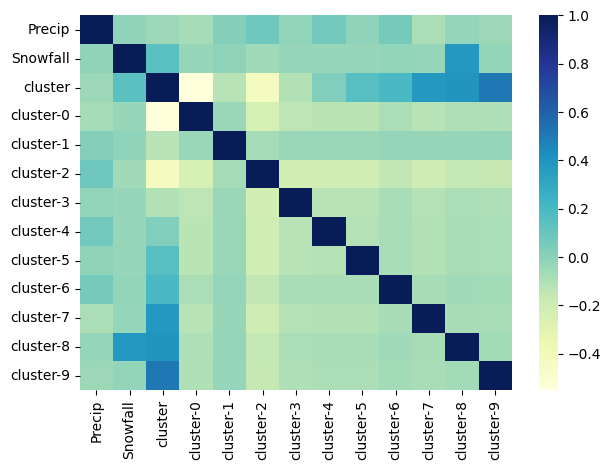

In [ ]:
for c in range(len(colors)):
    df_c2[f'cluster-{c}'] = df_c2['cluster'] == c
sns.heatmap(df_c2.corr(numeric_only=True), cmap='YlGnBu')
plt.tight_layout()

# Model
Ridge Regression with previous days using wind speed, poor weather and precipitation etc. to predict precipitation

In [ ]:
# data preparation
df_ridge = df_c.drop(columns=['STA', 'Date', 'cluster', 'State', 'Longitude', 'WindGustSpd']).copy()
df_ridge.dropna(axis=0, inplace=True)
X = df_ridge.drop(columns=['Precip', 'Snowfall'])
Y = df_ridge[['Precip', 'Snowfall']]

sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(data=X_scaled, columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=42)

# Training
reg = Ridge()
reg.fit(X_train, y_train)

# Prediction
pred_train = reg.predict(X_train)
pred_test = reg.predict(X_test)

r2 score
Train set: 0.5520806324826766
Test set: 0.547382456247399
-----------------------------
MAE: 2.2207656916576024
Train set size: 73250
Test set size: 24417
intercept (m):  [3.61004893 0.22823889]
coef (b) of each independent variable:  [[-2.33244494e+00  1.36435627e+00  8.63828138e-01  2.26493637e+00
  -4.86598176e-01  1.23435178e-01  2.15227512e+00 -5.94973558e-02
  -4.96961219e-01  6.97056035e-01 -6.69751664e-03 -4.83475618e-01
   6.67622905e-01  5.75515029e-01  5.77204553e-01  5.28530590e-01]
 [-3.43972907e-02 -1.51813851e-02  2.26080428e-02  1.73103134e-02
   1.60791165e-03 -4.19093518e-03  2.84725950e-04  2.45393433e+00
   3.51934084e-03 -1.74339469e-03  1.17239780e-01 -4.84683061e-03
  -2.67114486e-03 -1.62084987e-03 -3.51138218e-05 -4.14985201e-04]]


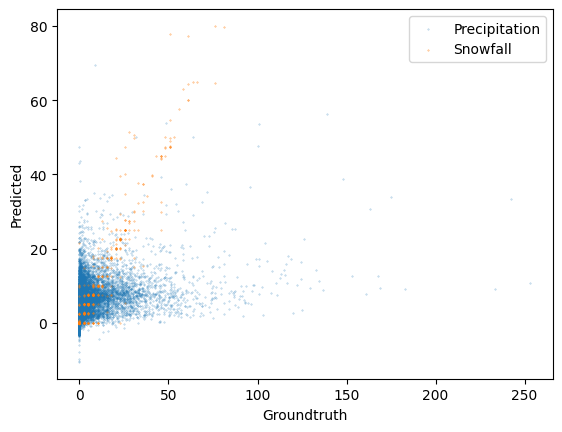

In [ ]:
print("r2 score")
print("Train set:", metrics.r2_score(y_train, pred_train))
print("Test set:", metrics.r2_score(y_test, pred_test))
print('-----------------------------')
print('MAE:', metrics.mean_absolute_error(y_test, pred_test))
print('Train set size:', len(X_train))
print('Test set size:', len(X_test))
print("intercept (m): ", reg.intercept_)
print("coef (b) of each independent variable: ", reg.coef_)

plt.scatter(y_test['Precip'], pred_test[:,0], s=0.1, alpha=0.5, label='Precipitation')
plt.scatter(y_test['Snowfall'], pred_test[:,1], s=0.1, alpha=0.8, label='Snowfall')
plt.xlabel("Groundtruth")
plt.ylabel("Predicted")
plt.legend()

## Snowfall-only prediction


In [ ]:
# Data preparation
df_ridge = df_c.drop(columns=['STA', 'State', 'WindGustSpd']).copy()
df_ridge.dropna(axis=0, inplace=True)
X = df_ridge.drop(columns=['Precip', 'Snowfall', 'Date', 'cluster'])
Y = df_ridge['Snowfall']

sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(data=X_scaled, columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=42)

# Training
reg = Ridge()
reg.fit(X_train, y_train)

# Prediction
pred_train = reg.predict(X_train)
pred_test = reg.predict(X_test)

r2 score
Train set: 0.9436782237200226
Test set: 0.9321542111686856
-----------------------------
MAE: 0.06982714492398301
Train set size: 73250
Test set size: 24417
intercept (m):  0.22823653145706713
coef (b) of each independent variable:  [-3.48869152e-02 -1.45968136e-02  2.26540024e-02  1.73207287e-02
  9.25151634e-04  1.81586863e-03 -4.15579202e-03  2.48838418e-04
  2.45396442e+00  3.54043354e-03 -1.76454335e-03  1.17229452e-01
 -4.80570239e-03 -2.68930668e-03 -1.63021368e-03 -4.81665897e-05
 -4.27517949e-04]


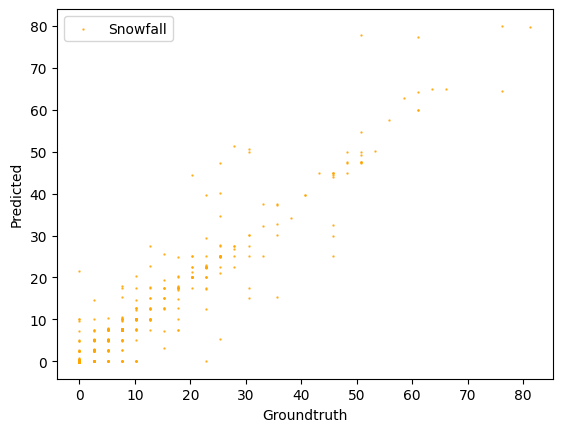

In [ ]:
# Evaluation
print("r2 score")
print("Train set:", metrics.r2_score(y_train, pred_train))
print("Test set:", metrics.r2_score(y_test, pred_test))
print('-----------------------------')
print('MAE:', metrics.mean_absolute_error(y_test, pred_test))
print('Train set size:', len(X_train))
print('Test set size:', len(X_test))
print("intercept (m): ", reg.intercept_)
print("coef (b) of each independent variable: ", reg.coef_)

plt.scatter(y_test, pred_test, s=0.5, alpha=0.8, label='Snowfall', c='orange')
plt.xlabel("Groundtruth")
plt.ylabel("Predicted")
plt.legend()